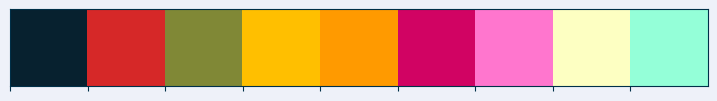

In [2]:
# @title Libraries
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

color_bg_site = "#EEF1F9"
color_text_site = "#003049"
# Colors
mpl.rcParams["figure.facecolor"] = color_bg_site
mpl.rcParams["axes.facecolor"] = color_bg_site
mpl.rcParams["savefig.facecolor"] = color_bg_site

# Text colors
mpl.rcParams['text.color'] = color_text_site
mpl.rcParams['axes.labelcolor'] = color_text_site
mpl.rcParams['xtick.color'] = color_text_site
mpl.rcParams['ytick.color'] = color_text_site

# Line colors
mpl.rcParams['axes.edgecolor'] = color_text_site

colors_site = ['#07212F', '#D62828', '#808836', '#FFBF00', '#FF9A00', '#D10363', '#FF76CE', '#FDFFC2', '#94FFD8']

# Optionally, you can visualize the palette
sns.palplot(colors_site)

plt.show()

# @title Typesetting
# https://stackoverflow.com/a/65841091
from matplotlib import font_manager as fm, pyplot as plt

font_files = fm.findSystemFonts()

# Install fonts
for font_file in font_files:
  fm.fontManager.addfont(font_file)

  # @title Plot settings
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams["figure.figsize"] = 16,8

# Text
mpl.rcParams['font.family'] = 'Roboto'
mpl.rcParams['font.size'] = 22

# Title
mpl.rcParams['figure.titlesize'] = 32
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.titleweight'] = 'bold'

# Labels
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22

# Spacing
mpl.rcParams['axes.titlepad'] = 72
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['xtick.minor.width'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['ytick.minor.width'] = 0

# Spines and grids
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

# Legends
mpl.rcParams['legend.title_fontsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = False

# Bars
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

Data Set

preprocessed by renaming columns and converting to appropriate types

In [3]:
df = pd.read_csv("disasters_dataset.csv")
df = df.rename(columns={'ISO3':'Country Code', 'Country / Territory': 'Country', 'Disaster Internal Displacements (Raw)': 'DID'})
df['DID'] = df['DID'].astype(int)
df['Year'] = df['Year'].astype(int)
df_PHL = df[df['Country Code'] == 'PHL']
df_IDN = df[df['Country Code'] == 'IDN']
df_VNM = df[df['Country Code'] == 'VNM']

print(df_PHL.shape)
print(df_IDN.shape)
print(df_VNM.shape)

df_PHL_data = df_PHL.groupby(['Hazard Type', 'Year'])['DID'].sum().reset_index()
df_VNM_data = df_VNM.groupby(['Hazard Type', 'Year'])['DID'].sum().reset_index()
df_IDN_data = df_IDN.groupby(['Hazard Type', 'Year'])['DID'].sum().reset_index()
df_PHL_data_year = df_PHL_data.groupby(['Year'])['DID'].sum().reset_index()
df_VNM_data_year = df_VNM_data.groupby(['Year'])['DID'].sum().reset_index()
df_IDN_data_year = df_IDN_data.groupby(['Year'])['DID'].sum().reset_index()

(506, 5)
(1766, 5)
(294, 5)


RQ1 Plot

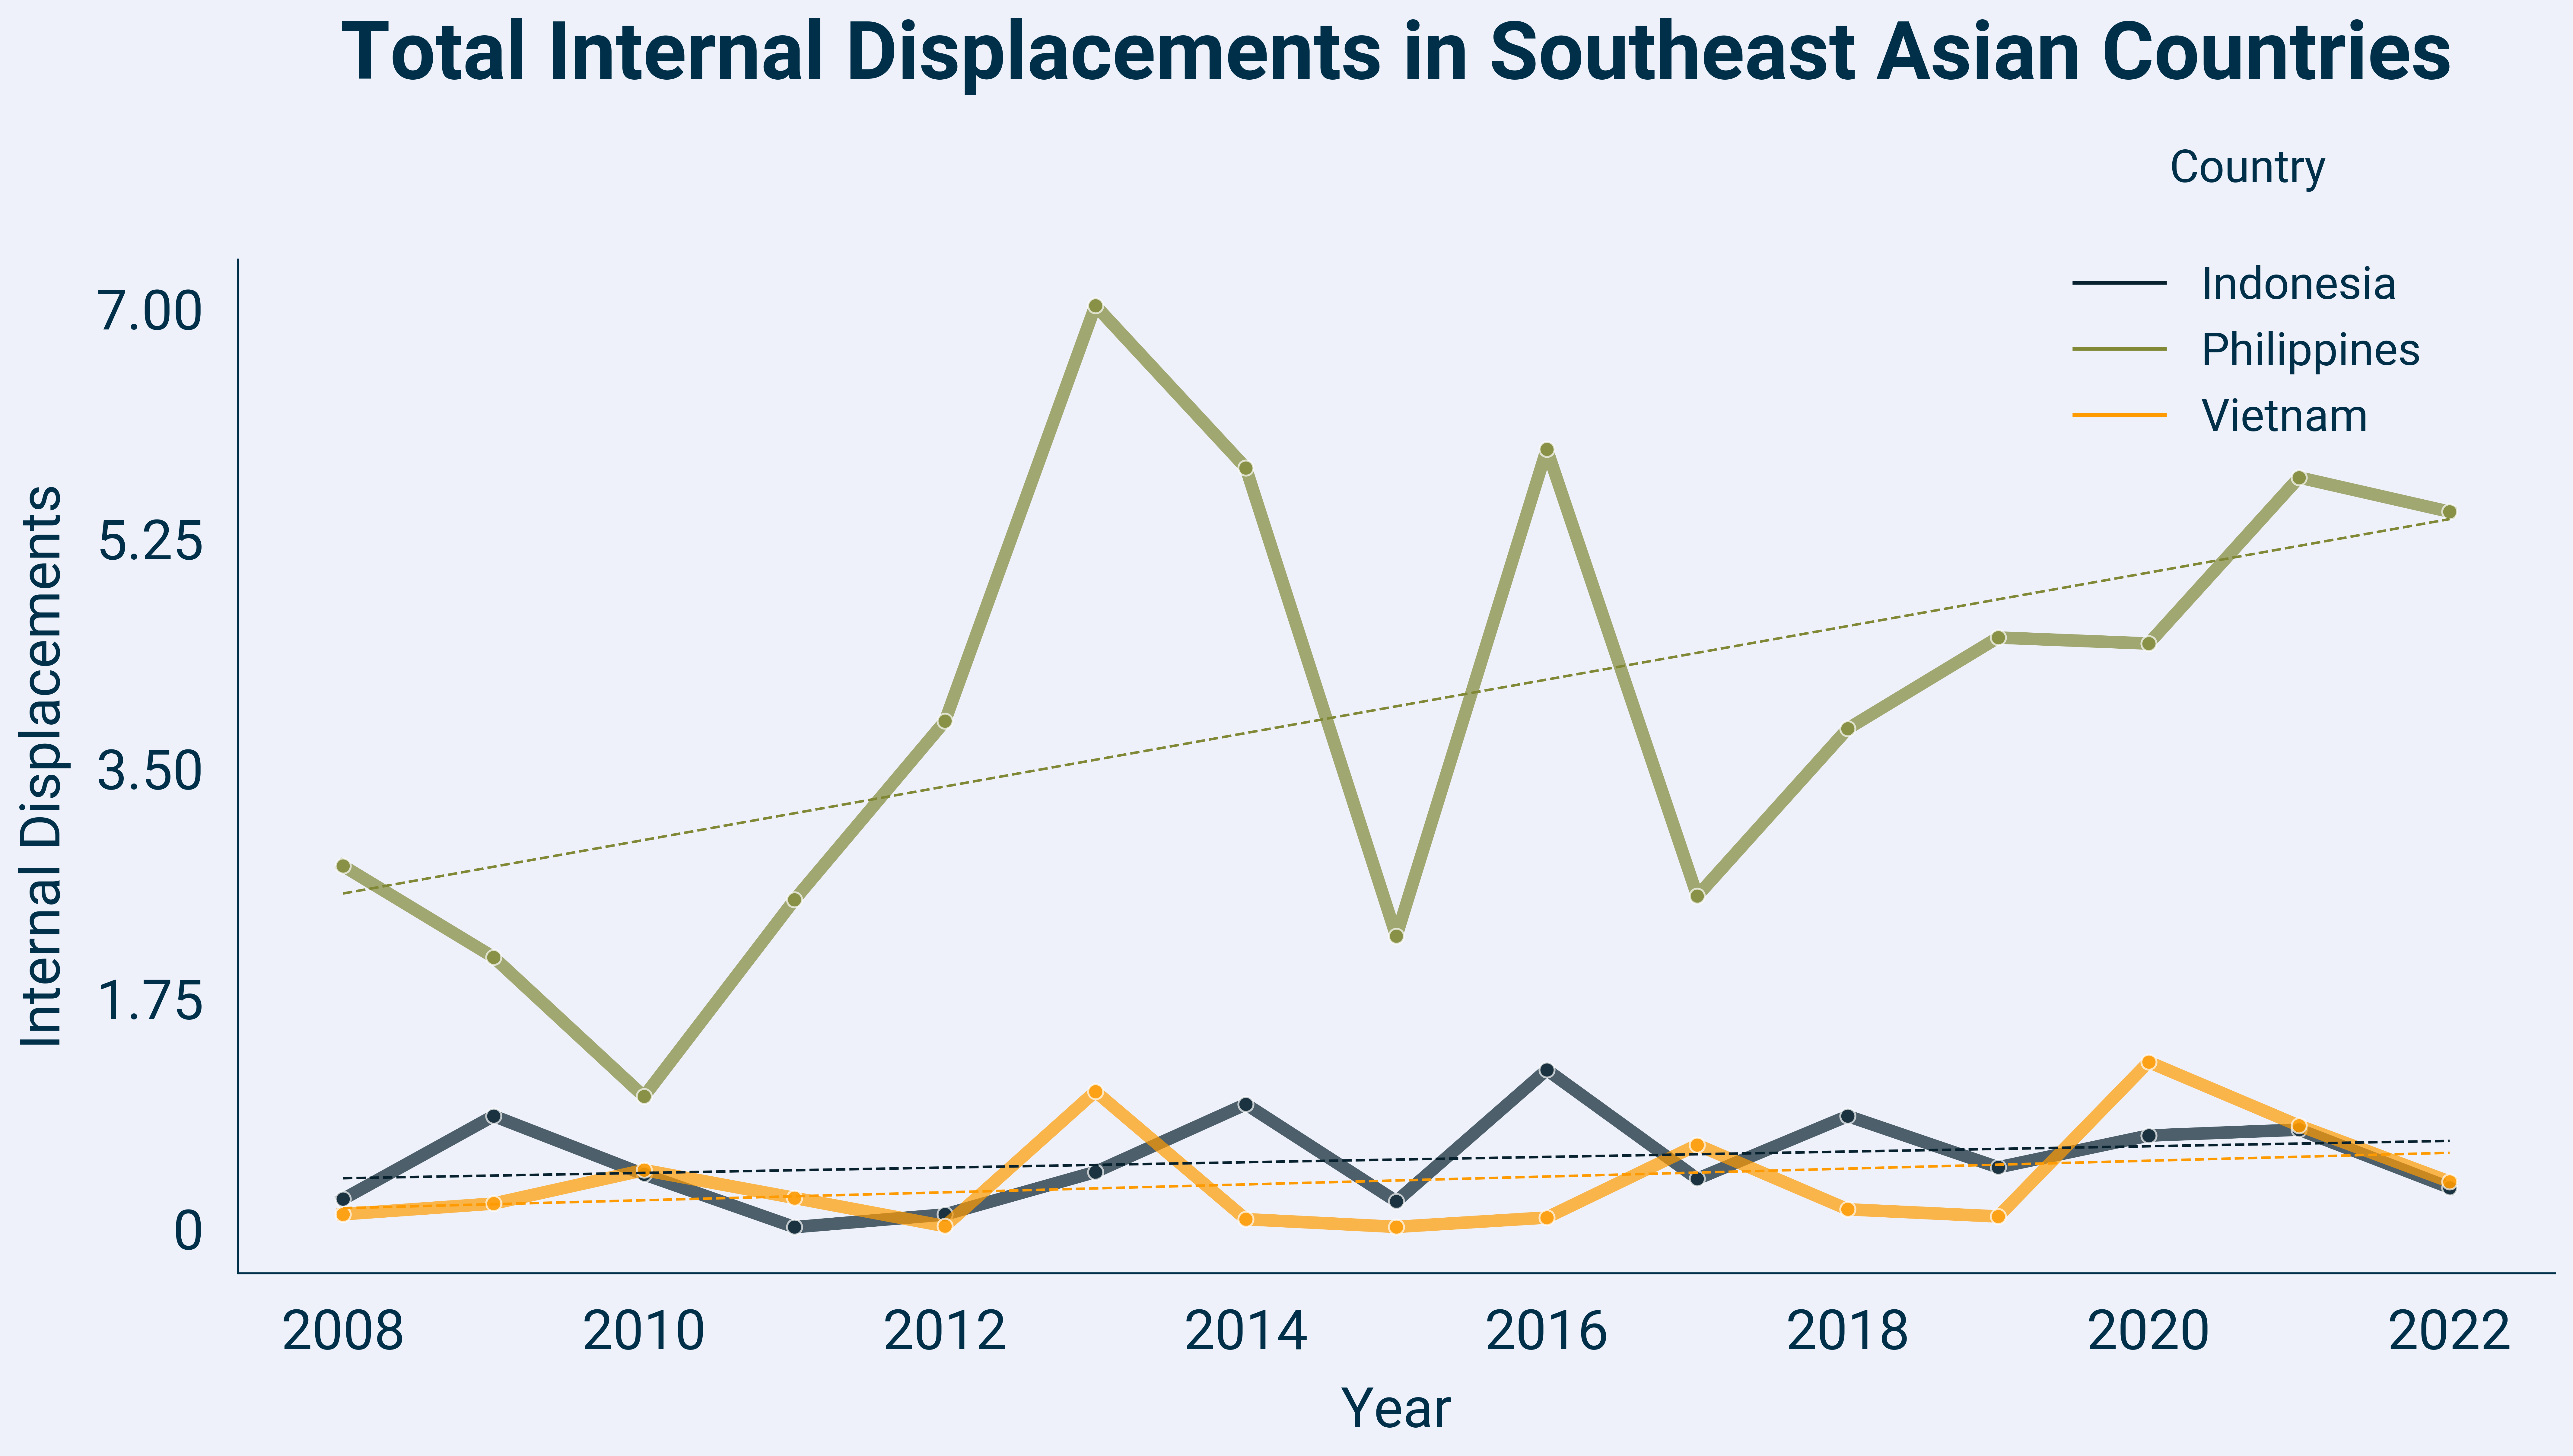

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df and colors_site are defined earlier in your code

# Data preparation
df_NS_data = df.groupby(['Country', 'Year'])['DID'].sum().reset_index()

# Plotting
f, ax = plt.subplots(figsize=(16, 8))

sns.lineplot(
    data=df_NS_data, x='Year', y='DID', hue='Country', marker='o', ax=ax,
    palette=[colors_site[0], colors_site[2], colors_site[4]], alpha=0.7, linewidth=5, legend='brief'
)

ax.set(xlabel="", ylabel="Internal Displacements")
ax.set_title('Total Internal Displacements in Southeast Asian Countries')

# Clean up y-axis
ax.set_yticks([0, 1750000, 3500000, 5250000, 7000000])
ax.set_yticklabels(['0', '1.75', '3.50', '5.25', '7.00'])
ax.set_ylabel(ylabel="Internal Displacements", labelpad=10)
ax.set_xlabel(xlabel="Year", labelpad=10)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

sns.move_legend(ax, "upper right", bbox_to_anchor=(0.96, 1.15), ncol=1, title='Country\n')

# Adding trendline
for line in ax.lines:
    x = line.get_xdata()
    y = line.get_ydata()
    if len(x) > 0 and len(y) > 0:  # Check for non-empty vectors
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        ax.plot(x, p(x), color=line.get_color(), linestyle='--', linewidth=1)

plt.show()


RQ2 Plot

In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Assuming df_PHL and colors_site are defined earlier in your code

# Data preparation
df_RQ2_data = df_PHL.groupby(['Hazard Type', 'Year'])['DID'].sum().reset_index().sort_values('DID')
df_RQ2_data = df_RQ2_data.pivot(index='Year', columns='Hazard Type', values='DID').fillna(0)
sorted_columns = df_RQ2_data.sum().sort_values(ascending=False).index
df_RQ2_data = df_RQ2_data[sorted_columns]

# Create colormap
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors_site)

# Plotting
ax = df_RQ2_data.plot(kind='barh', stacked=True, figsize=(16, 8), colormap=cmap1)

# Customizing the plot
ax.set_xticks([0, 1750000, 3500000, 5250000, 7000000])
ax.set_xticklabels(['0', '1.75', '3.50', '5.25', '7.00'])
ax.set_xlabel("Internal Displacements (in millions)", labelpad=10)
ax.set_ylabel('Year')
ax.set_title('Displacements per Natural Disasters in the Philippines')
ax.legend(loc='upper right', title='Hazard Types', bbox_to_anchor=(1.2, 1.2))

# Show the plot
plt.show()


Hypothesis Testing

In [15]:
# Importing library
from scipy.stats import f_oneway, mannwhitneyu

# IDPs per country and year
PH = df_PHL_data_year['DID'].values
VN = df_VNM_data_year['DID'].values
ID = df_IDN_data_year['DID'].values


# Perform the Mann-Whitney U test
countries = [PH, VN, ID]
for first_country in range(len(countries)):
    for second_country in range(first_country+1, len(countries)):
        u_statistic, p_value = mannwhitneyu(countries[first_country], countries[second_country])
        print(f"Mann-Whitney U statistic: {u_statistic}")
        print(f"P-value: {p_value}")

        # Mann-Whiteney U test
        alpha = 0.05
        if p_value < alpha:
            print("The distributions are significantly different.")
        else:
            print("The distributions are not significantly different.")
        print("")

# ANOVA test
print("One-way ANOVA test between all three countries:")
print(f_oneway(PH, VN, ID))

Mann-Whitney U statistic: 223.0
P-value: 5.052703540469845e-06
The distributions are significantly different.

Mann-Whitney U statistic: 224.0
P-value: 4.143220097537536e-06
The distributions are significantly different.

Mann-Whitney U statistic: 77.0
P-value: 0.14657603430900068
The distributions are not significantly different.

One-way ANOVA test between all three countries:
F_onewayResult(statistic=55.3868086661755, pvalue=1.6719354237332856e-12)
